In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [5]:
directory = "horse-or-human"
train_data = image_dataset_from_directory(directory,
                                          validation_split = 0.2,
                                          subset = "training",
                                          image_size = (224,224),
                                          batch_size = 32,
                                          seed = 42,
                                          label_mode = "binary")

test_data = image_dataset_from_directory(directory,
                                         validation_split = 0.2,
                                         subset = "validation",
                                         image_size = (224,224),
                                         batch_size = 32,
                                         seed = 42,
                                         label_mode = "binary")

Found 1027 files belonging to 2 classes.
Using 822 files for training.
Found 1027 files belonging to 2 classes.
Using 205 files for validation.


In [6]:
print(len(train_data.file_paths))

822


In [8]:
import matplotlib.pyplot as plt
import numpy as np

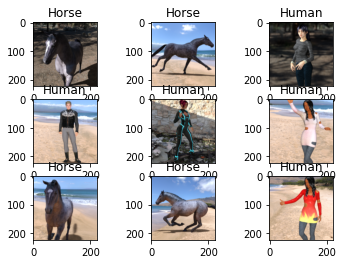

In [11]:
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title("Horse" if labels[i] == 0 else "Human")

In [ ]:
train_data = train_data.map(lambda x,y: (x/255.0, y))
test_data = test_data.map(lambda x,y: (x/255.0, y))

In [16]:
base_model = ResNet50(weights = "imagenet", include_top=False)
base_model.trainable = False

In [18]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation="sigmoid")
])
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [19]:
history = model.fit(train_data, epochs = 10, validation_data= test_data)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.4721 - loss: 0.7223 - val_accuracy: 0.6585 - val_loss: 0.6730
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6023 - loss: 0.6743 - val_accuracy: 0.6585 - val_loss: 0.6573
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6386 - loss: 0.6600 - val_accuracy: 0.8000 - val_loss: 0.6375
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7469 - loss: 0.6399 - val_accuracy: 0.7902 - val_loss: 0.6231
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7085 - loss: 0.6318 - val_accuracy: 0.7659 - val_loss: 0.6107
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6834 - loss: 0.6228 - val_accuracy: 0.7366 - val_loss: 0.6018
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7261 - loss: 0.6116 - val_accuracy: 0.8049 - val_loss: 0.5865
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7078 - loss: 0.5951 - val_accuracy: 0.8146 - val_loss:

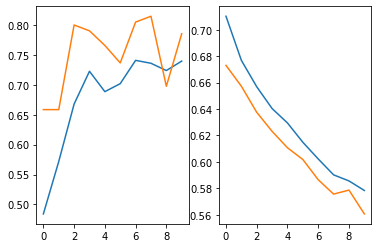

In [20]:
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [22]:
from tensorflow.keras.applications import VGG16
base_model2 = VGG16(weights = "imagenet", include_top=False)
base_model2.trainable = False

In [23]:
model2 = Sequential([
    base_model2,
    GlobalAveragePooling2D(),
    Dense(1, activation="sigmoid")
])
model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [24]:
history2 = model2.fit(train_data, epochs = 10, validation_data= test_data)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.5443 - loss: 0.7139 - val_accuracy: 0.7512 - val_loss: 0.6430
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.7815 - loss: 0.6277 - val_accuracy: 0.8683 - val_loss: 0.5888
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.8875 - loss: 0.5720 - val_accuracy: 0.8927 - val_loss: 0.5400
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9189 - loss: 0.5204 - val_accuracy: 0.9024 - val_loss: 0.4991
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9326 - loss: 0.4776 - val_accuracy: 0.9073 - val_loss: 0.4653
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9354 - loss: 0.4431 - val_accuracy: 0.9073 - val_loss: 0.4364
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9283 - loss: 0.4147 - val_accuracy: 0.9122 - val_loss: 0.4110
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9425 - loss: 0.3871 - val_accuracy: 0.9171 - val_loss:

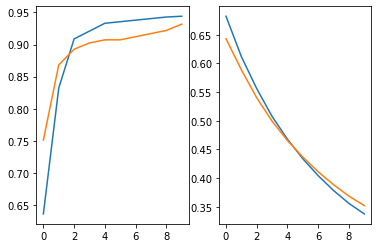

In [25]:
plt.subplot(1,2,1)
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])

plt.subplot(1,2,2)
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])

In [26]:
loss, acc = model2.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9611 - loss: 0.3252
